### Requirements
---

In [1]:
import umap
umap.__version__

'0.5.6'

In [2]:
import sklearn
sklearn.__version__

'1.5.0'

In [3]:
import matplotlib
matplotlib.__version__

'3.9.0'

In [4]:
import seaborn as sns
sns.__version__

'0.13.2'

-----

In [5]:
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import umap.umap_ as umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

sns.set(context="paper", style="white")

mnist = fetch_openml('mnist_784', version=1)

UMAP on the MNIST Digits dataset
--------------------------------

A simple example demonstrating how to use UMAP on a larger
dataset such as MNIST. We first pull the MNIST dataset and
then use UMAP to reduce it to only 2-dimensions for
easy visualisation.

Note that UMAP manages to both group the individual digit
classes, but also to retain the overall global structure
among the different digit classes -- keeping 1 far from
0, and grouping triplets of 3,5,8 and 4,7,9 which can
blend into one another in some cases.


In [8]:
reducer = umap.UMAP(random_state=42, n_neighbors=10, min_dist=0.1)

In [9]:
%%time
embedding = reducer.fit_transform(mnist.data)

CPU times: user 1min 51s, sys: 1.49 s, total: 1min 52s
Wall time: 1min 5s


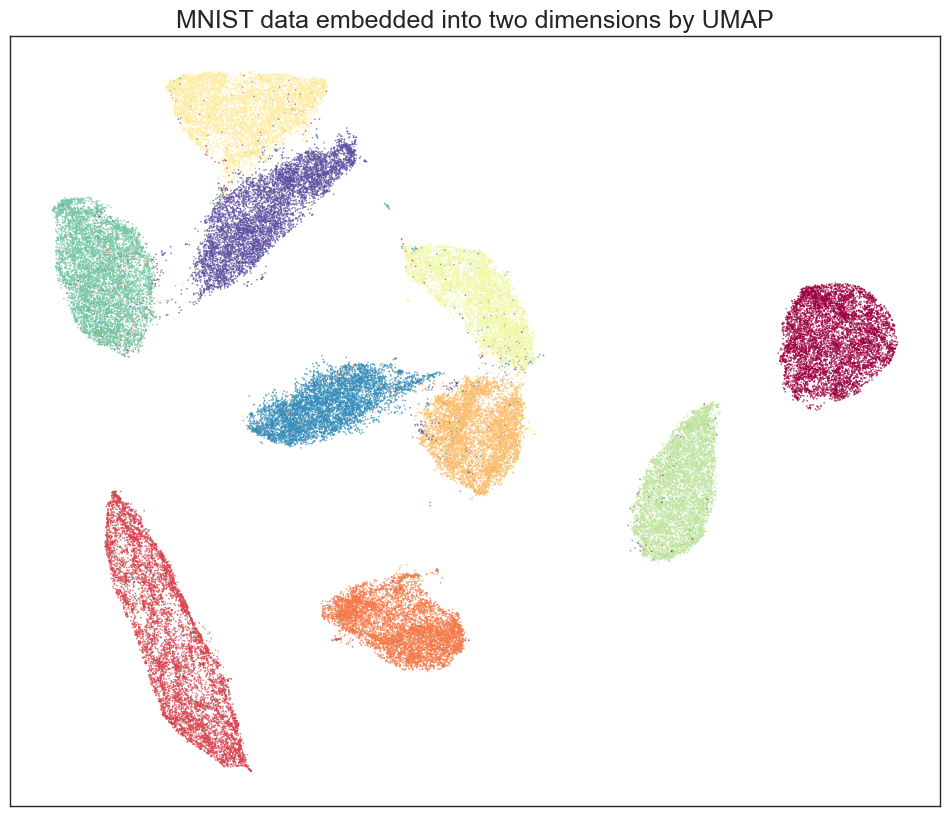

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
color = mnist.target.astype(int)
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.show()

t-SNE on the MNIST Digits dataset
--------------------------------

In [11]:
%%time
from sklearn.manifold import TSNE
embedding = TSNE(random_state=42, perplexity=15, n_iter=500).fit_transform(mnist.data)

CPU times: user 13min 34s, sys: 7.14 s, total: 13min 41s
Wall time: 9min 10s


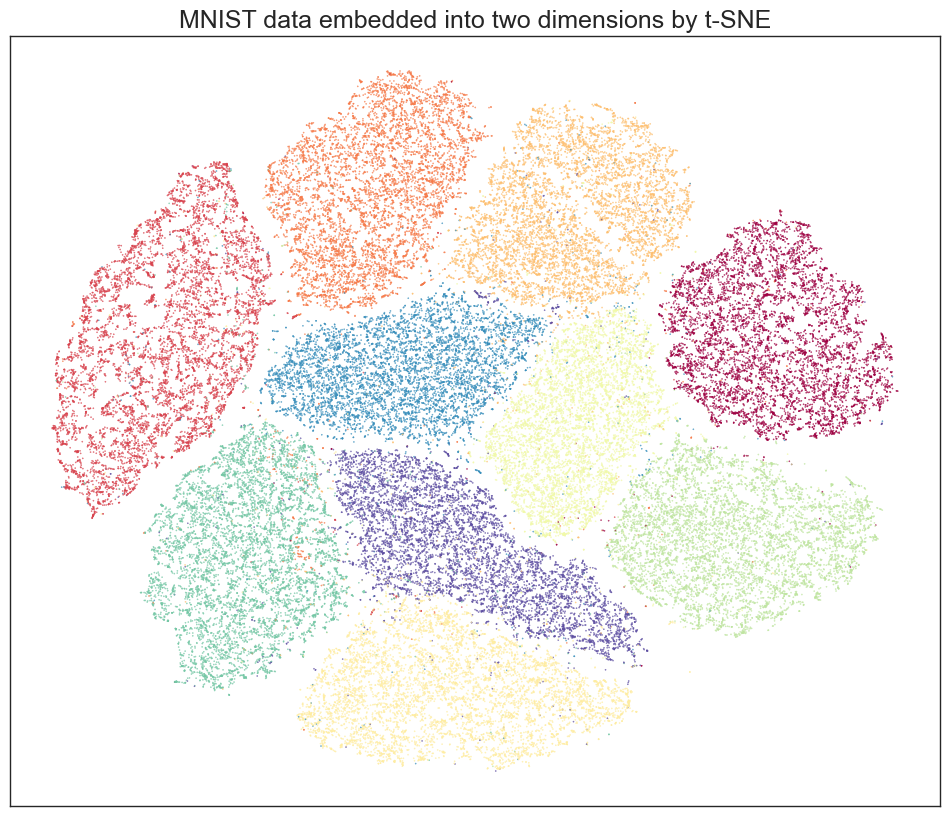

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
color = mnist.target.astype(int)
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by t-SNE", fontsize=18)

plt.show()